In [163]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Function Building ARIMA

In [2]:
song = pd.read_csv('data.csv')

In [3]:
top10Countries = song.groupby('Region')['Streams'].mean().reset_index().sort_values('Streams',ascending=False).reset_index()['Region'][1:10]

In [4]:
song_top10 = pd.DataFrame([x for i,x in song.iterrows() if x['Region'] in np.array(top10Countries)])

In [5]:
filLyr = pd.read_csv('filteredGeniusLyrics5540.csv')

In [7]:
song_total = filLyr.merge(song_top10,on=['Artist','Track Name'])

In [17]:
t = song_total['Track Name'][0]
a = song_total['Artist'][0]

In [77]:
migos = song_total[(song_total.Artist == a) & (song_total['Track Name'] == t) & (song_total.Region == 'us')]

In [78]:
migos.index = pd.to_datetime(migos.Date)

In [79]:
migosTs = migos.Streams

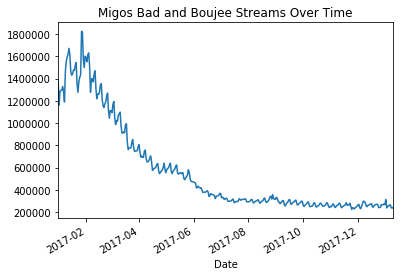

In [80]:
migosTs.plot(title='Migos Bad and Boujee Streams Over Time',)

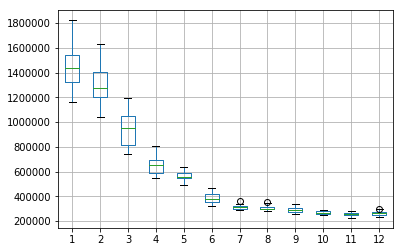

In [81]:
groups = migosTs.groupby(migosTs.index.month)
months = pd.DataFrame()
for name,group in groups:
    months[name] = group.values[0:28]
months.boxplot()

In [159]:
windowSize = 15
rolmean = pd.Series.rolling(migosTs,center=False,window = windowSize).mean()
rolsd = pd.Series.rolling(migosTs,center=False,window = windowSize).std()


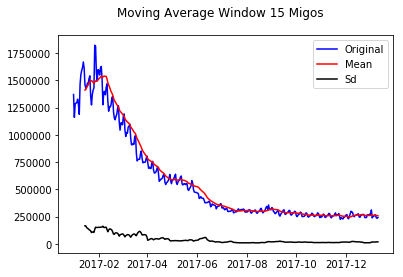

In [167]:
orig = plt.plot(migosTs,color='blue',label='Original')
mean = plt.plot(rolmean,color='red',label='Mean')
sd = plt.plot(rolsd,color='black',label='Sd')
plt.legend(loc='best')
plt.suptitle('Moving Average Window 15 Migos')
plt.show(block=False)

In [93]:
import math

In [96]:
## Dickey Fuller Test on this data
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(np.log(migosTs),autolag='AIC')
dfout = pd.Series(dftest[0:4],index=['Tstat','p-val','lagU','Samp'])
dfout

Tstat     -2.556771
p-val      0.102265
lagU      16.000000
Samp     353.000000
dtype: float64

In [106]:
def dftest(data):
    dftest = adfuller(data,autolag='AIC')
    dfout = pd.Series(dftest[0:4],index=['Tstat','p-val','lagU','Samp'])
    return dfout
    

In [97]:
mLog = np.log(migosTs)

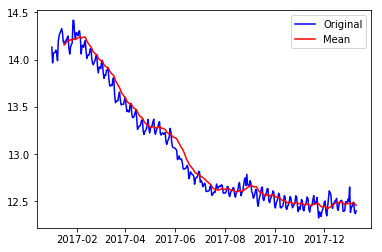

In [100]:
windowSize = 16
rolmean = pd.Series.rolling(mLog,center=False,window = windowSize).mean()
rolsd = pd.Series.rolling(mLog,center=False,window = windowSize).std()
orig = plt.plot(mLog,color='blue',label='Original')
mean = plt.plot(rolmean,color='red',label='Mean')
#sd = plt.plot(rolsd,color='black',label='Sd')
plt.legend(loc='best')

plt.show(block=False)


In [111]:
dftest(rolmean.dropna())

Tstat     -3.456006
p-val      0.009192
lagU      17.000000
Samp     337.000000
dtype: float64

In [115]:
ews = pd.Series.ewm(mLog,adjust=True,halflife=15,min_periods=0).mean()

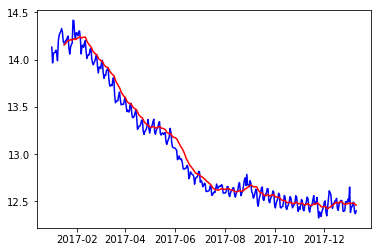

In [126]:
orig = plt.plot(mLog,color='blue',label='Original')
mean = plt.plot(rolmean,color='red',label='Mean')

In [120]:
dftest((mLog - rolmean).dropna())

Tstat     -3.201920
p-val      0.019874
lagU      16.000000
Samp     338.000000
dtype: float64

In [131]:
## Arima model test
prev = 5
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(mLog,order=(prev,1,prev))
res = model.fit(disp=-1)


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


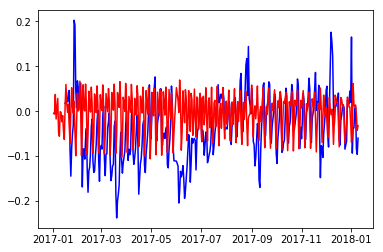

In [132]:
res.fittedvalues
orig = plt.plot(mLog-rolmean,color='blue',label='Original')
mean = plt.plot(res.fittedvalues,color='red',label='Mean')

In [ ]:
prev = 10
model = ARIMA(mLog,order=(prev,0,prev))
modFit = model.fit()

In [147]:
modFit.maparams

array([-0.83040299,  1.44646524, -0.93478307,  0.99022024, -0.12743367])